In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [216]:
train_tr = pd.read_csv('train.csv')
train_tst = pd.read_csv('test.csv')

In [217]:
survived_train = train_tr.Survived
train = pd.concat([train_tr.drop(['Survived'], axis=1), train_tst])

In [218]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
train.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [220]:
train.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [222]:
train['Has_Cabin'] = ~train.Cabin.isnull()
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [223]:
train.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,True
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False


In [224]:
train.Name.head()


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

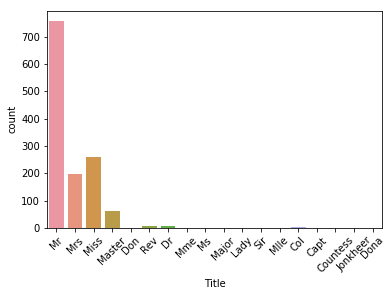

In [225]:
train['Title'] = train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=train);
plt.xticks(rotation=45);

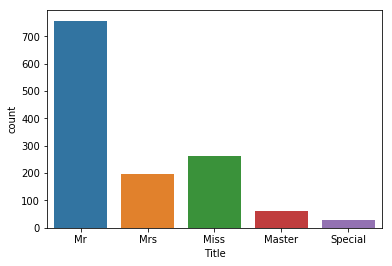

In [226]:
train['Title'] = train['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
train['Title'] = train['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=train);


In [227]:
train.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,False,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,True,Special
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,False,Mr
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,False,Mr
417,3,"Peter, Master. Michael J",male,NaN,1,1,22.3583,C,False,Master


In [228]:
train['Age'] = train.Age.fillna(train.Age.median())
train['Fare'] = train.Fare.fillna(train.Fare.median())
train['Embarked'] = train['Embarked'].fillna('S')
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,True,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,Mr


In [229]:
train['CatAge'] = pd.qcut(train.Age, q=4, labels=False )
train['CatFare']= pd.qcut(train.Fare, q=4, labels=False)
train.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,CatAge,CatFare
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False,Mr,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,Mrs,3,3
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,Miss,1,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,True,Mrs,2,3
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,Mr,2,1


In [230]:
train.drop('Age',axis=1,inplace=True)
train.head()
           

,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,CatAge,CatFare
0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,False,Mr,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,True,Mrs,3,3
2,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,False,Miss,1,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,True,Mrs,2,3
4,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,False,Mr,2,1


In [231]:
train.drop('Name',axis=1,inplace=True)
train.head()
           

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Has_Cabin,Title,CatAge,CatFare
0,3,male,1,0,7.2500,S,False,Mr,0,0
1,1,female,1,0,71.2833,C,True,Mrs,3,3
2,3,female,0,0,7.9250,S,False,Miss,1,1
3,1,female,1,0,53.1000,S,True,Mrs,2,3
4,3,male,0,0,8.0500,S,False,Mr,2,1


In [232]:
train.drop('Fare',axis=1,inplace=True)
train.head()
           

,Pclass,Sex,SibSp,Parch,Embarked,Has_Cabin,Title,CatAge,CatFare
0,3,male,1,0,S,False,Mr,0,0
1,1,female,1,0,C,True,Mrs,3,3
2,3,female,0,0,S,False,Miss,1,1
3,1,female,1,0,S,True,Mrs,2,3
4,3,male,0,0,S,False,Mr,2,1


In [233]:
train.drop('SibSp',axis=1,inplace=True)
train.head()
           

,Pclass,Sex,Parch,Embarked,Has_Cabin,Title,CatAge,CatFare
0,3,male,0,S,False,Mr,0,0
1,1,female,0,C,True,Mrs,3,3
2,3,female,0,S,False,Miss,1,1
3,1,female,0,S,True,Mrs,2,3
4,3,male,0,S,False,Mr,2,1


In [234]:
train.drop('Parch',axis=1,inplace=True)
train.head()
           

,Pclass,Sex,Embarked,Has_Cabin,Title,CatAge,CatFare
0,3,male,S,False,Mr,0,0
1,1,female,C,True,Mrs,3,3
2,3,female,S,False,Miss,1,1
3,1,female,S,True,Mrs,2,3
4,3,male,S,False,Mr,2,1


In [237]:
train_dum = pd.get_dummies(train, drop_first=True)
train_dum.head()

,Pclass,Has_Cabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,False,0,0,1,0,1,0,1,0,0
1,1,True,3,3,0,0,0,0,0,1,0
2,3,False,1,1,0,0,1,1,0,0,0
3,1,True,2,3,0,0,1,0,0,1,0
4,3,False,2,1,1,0,1,0,1,0,0


In [238]:
train_train = train_dum.iloc[:891]
train_test = train_dum.iloc[891:]

In [240]:
X = train_train.values
test = train_test.values
y = survived_train.values

In [247]:
from sklearn.linear_model import LogisticRegression

In [248]:
logmodel = LogisticRegression()
logmodel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [250]:
predictions = logmodel.predict(X)

In [251]:
logmodel.score(X,y)

0.8092031425364759

In [252]:
from sklearn.metrics import classification_report

In [253]:
print(classification_report(y,predictions))

             precision    recall  f1-score   support

          0       0.85      0.85      0.85       549
          1       0.75      0.75      0.75       342

avg / total       0.81      0.81      0.81       891



In [ ]:
#The accuracy of your submission is 81.